In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/manufacturing-data-for-polynomial-regression/manufacturing.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("/kaggle/input/manufacturing-data-for-polynomial-regression/manufacturing.csv")

In [4]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [6]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


In [7]:
df.isnull().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.corr()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
Temperature (°C),1.000000,-0.024754,0.571743,0.974901,0.971210,-0.461279
Pressure (kPa),-0.024754,1.000000,0.773572,0.151095,-0.022862,0.013129
Temperature x Pressure,0.571743,0.773572,1.000000,0.694733,0.555579,-0.258474
Material Fusion Metric,0.974901,0.151095,0.694733,1.000000,0.976708,-0.511972
Material Transformation Metric,0.971210,-0.022862,0.555579,0.976708,1.000000,-0.575756
Quality Rating,-0.461279,0.013129,-0.258474,-0.511972,-0.575756,1.000000


<Axes: >

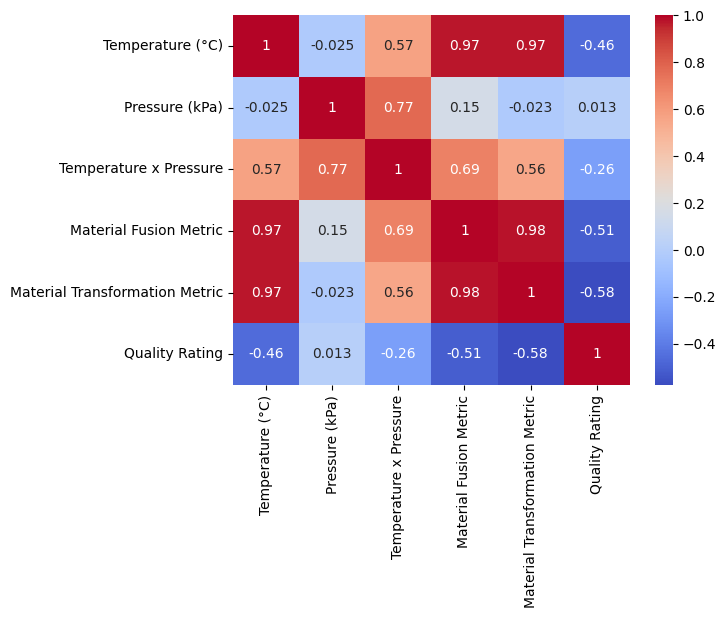

In [10]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

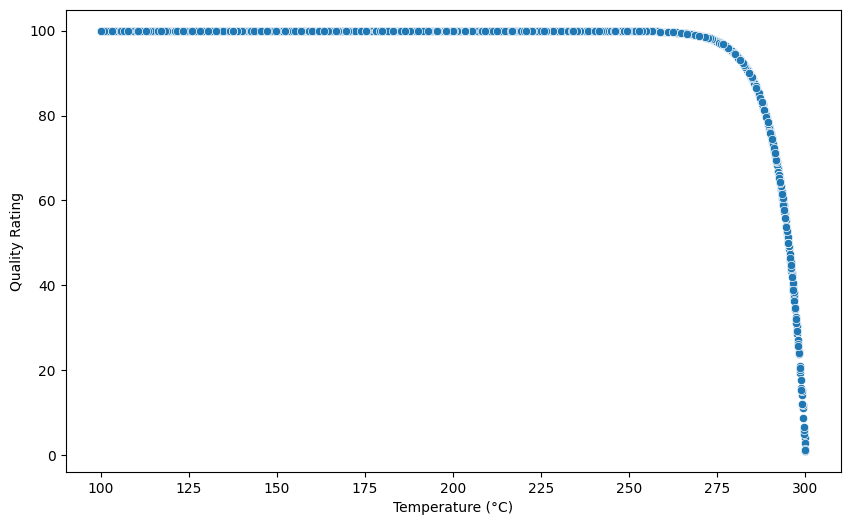

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature (°C)', y='Quality Rating', data=df)
plt.show()


In [12]:
df.columns

Index(['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
       'Material Fusion Metric', 'Material Transformation Metric',
       'Quality Rating'],
      dtype='object')

In [13]:
X = df[['Temperature (°C)']]
X

,Temperature (°C)
0,209.762701
1,243.037873
2,220.552675
3,208.976637
4,184.730960
...,...
3952,156.811578
3953,197.850406
3954,241.357144
3955,209.040239


In [14]:
y = df[[ 'Quality Rating']]
y

,Quality Rating
0,99.999971
1,99.985703
2,99.999758
3,99.999975
4,100.000000
...,...
3952,100.000000
3953,99.999997
3954,99.989318
3955,99.999975


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42 )

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(X_train)

In [18]:
y

,Quality Rating
0,99.999971
1,99.985703
2,99.999758
3,99.999975
4,100.000000
...,...
3952,100.000000
3953,99.999997
3954,99.989318
3955,99.999975


In [19]:
y_pred[:3]

array([[ 94.73949516],
       [ 98.49980006],
       [100.44117842]])

In [20]:
y_pred_test = lr.predict(X_test)

In [21]:
y_pred_test[:3]

array([[86.376162  ],
       [89.38846926],
       [88.73354832]])

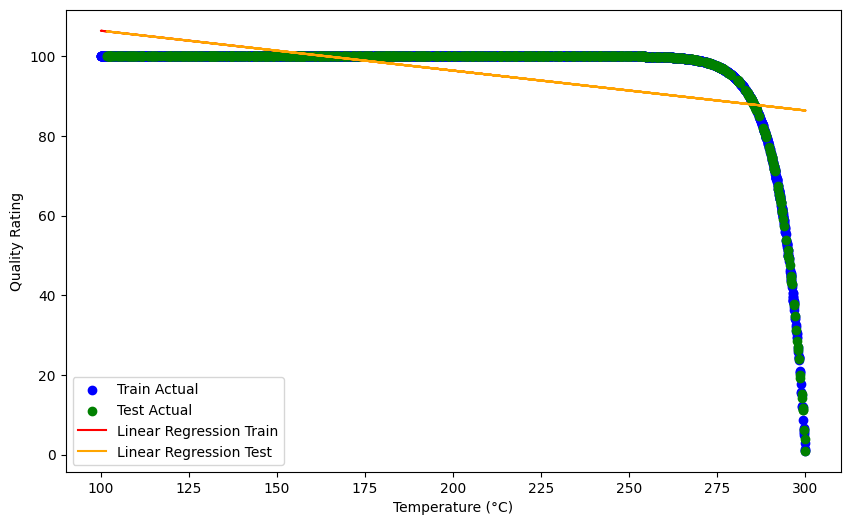

In [22]:
plt.figure(figsize=(10,6))

plt.scatter(X_train, y_train, color="b", label="Train Actual")
plt.scatter(X_test, y_test, color="g", label="Test Actual")
plt.plot(X_train, y_pred, color="r", label="Linear Regression Train")
plt.plot(X_test, y_pred_test, color="orange", label = "Linear Regression Test")
plt.xlabel('Temperature (°C)')
plt.ylabel('Quality Rating')
plt.legend()
plt.show()

# Evaluation

In [23]:
rmse_linear = np.sqrt(mean_squared_error(y_train,y_pred))
r2_linear= r2_score(y_train,y_pred)


In [24]:
print(f'RMSE Mean Square ERROR : {rmse_linear}')
print(f'R-Squared : {r2_linear}')



RMSE Mean Square ERROR : 11.222800012623596
R-Squared : 0.21210926738525981


# Polynomial Regression

In [25]:
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)
x_poly

array([[1.00000000e+00, 2.09762701e+02, 4.40003906e+04],
       [1.00000000e+00, 2.43037873e+02, 5.90674078e+04],
       [1.00000000e+00, 2.20552675e+02, 4.86434825e+04],
       ...,
       [1.00000000e+00, 2.41357144e+02, 5.82532711e+04],
       [1.00000000e+00, 2.09040239e+02, 4.36978217e+04],
       [1.00000000e+00, 1.63359996e+02, 2.66864881e+04]])

In [26]:
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [27]:
y_poly_pred = model.predict(x_poly)

In [28]:
y

,Quality Rating
0,99.999971
1,99.985703
2,99.999758
3,99.999975
4,100.000000
...,...
3952,100.000000
3953,99.999997
3954,99.989318
3955,99.999975


In [29]:
y_poly_pred

array([[102.36738235],
       [ 95.25748415],
       [100.58489993],
       ...,
       [ 95.73107738],
       [102.4688018 ],
       [104.3119686 ]])

In [30]:
rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y,y_poly_pred)

print(f"Root MEAN SQUARED ERROR  : {rmse}")
print(f"R-Squared : {r2}")

Root MEAN SQUARED ERROR  : 9.534565374796065
R-Squared : 0.4613061729741008


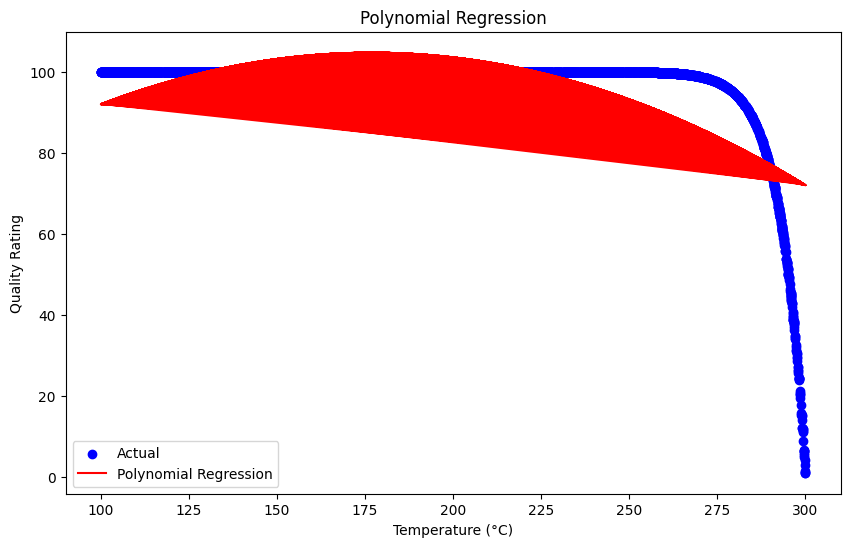

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', label='Actual')
plt.plot(X, y_poly_pred, color="r", label='Polynomial Regression')
plt.title("Polynomial Regression")
plt.xlabel("Temperature (°C)")
plt.ylabel("Quality Rating")
plt.legend()
plt.show()
